<a href="https://colab.research.google.com/github/joshuansu0897/NN_Examples/blob/main/nn_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [3]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples=N,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None
)

X, Y = gaussian_quantiles

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

In [6]:
Y = Y[:, np.newaxis]

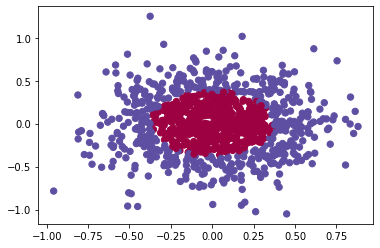

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], s=40, cmap=plt.cm.Spectral)

**Funciones de Activacion**

In [8]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x) / ((np.exp(-x) + 1) ** 2)
  
  return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
  if derivate:
    x[x <= 0] = 0
    x[x > 0] = 1
    return x
  
  return np.maximum(0, x)

**Funcion de Perdida**

In [9]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)

  return np.mean((y_hat - y)**2)

**Estructura de la Red Neuronal**

In [10]:
def inizialize_parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L-1):
    parameters['W' + str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) - 1
    parameters['b' + str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) - 1
  
  return parameters

In [11]:
layer_dims = [2, 4, 8, 1]
params = inizialize_parameters_deep(layer_dims)
params

{'W1': array([[ 0.81475383, -0.28679605,  0.96798384,  0.45987384],
        [ 0.5152698 ,  0.95030474,  0.15045629,  0.49489677]]),
 'b1': array([[-0.36733874,  0.80142988, -0.4286735 , -0.14191672]]),
 'W2': array([[ 0.71680231, -0.17363224,  0.11508249, -0.44655237,  0.77724907,
         -0.77740159, -0.2940377 ,  0.4327965 ],
        [-0.89642366,  0.83760138, -0.68903791,  0.21583563, -0.87349472,
          0.71540582,  0.30242519,  0.64086221],
        [-0.9113491 ,  0.69319471,  0.86167037, -0.38125212, -0.99641885,
         -0.3379211 ,  0.51663217,  0.27680727],
        [ 0.23402175, -0.36984408,  0.98447293,  0.06641285, -0.58691596,
         -0.74997384, -0.5835582 , -0.4480781 ]]),
 'b2': array([[ 0.51867243, -0.42354802,  0.85200484,  0.36135638, -0.78399379,
         -0.33656456,  0.86890902,  0.49869881]]),
 'W3': array([[-0.60258822],
        [-0.019371  ],
        [-0.40942932],
        [-0.64756825],
        [-0.06406402],
        [-0.36621984],
        [-0.09029509],


In [12]:
params['W1'].shape

(2, 4)

In [13]:
X.shape

(1000, 2)

**Ahora aplicamos producto punto**

In [14]:
np.matmul(X, params['W1'])

array([[-0.07016064, -0.40584347,  0.09230238, -0.11723476],
       [-0.46187366, -0.56696885, -0.25108544, -0.39224703],
       [-0.35187752, -0.54185909, -0.14644421, -0.31865217],
       ...,
       [-0.05841804,  0.57246329, -0.29457682,  0.06654396],
       [ 0.31270594,  0.01962264,  0.31860092,  0.19988795],
       [-0.16318045,  0.28418665, -0.28638101, -0.05121811]])

In [15]:
# or

X@params['W1']

array([[-0.07016064, -0.40584347,  0.09230238, -0.11723476],
       [-0.46187366, -0.56696885, -0.25108544, -0.39224703],
       [-0.35187752, -0.54185909, -0.14644421, -0.31865217],
       ...,
       [-0.05841804,  0.57246329, -0.29457682,  0.06654396],
       [ 0.31270594,  0.01962264,  0.31860092,  0.19988795],
       [-0.16318045,  0.28418665, -0.28638101, -0.05121811]])

**Ahora hacemos el entrenamiento**

In [46]:
# ahora aplicamos producto punto en toda la red

# entrada de los valores
def train_network(params, X) :
  params['A0'] = X

  # producto punto mas bias
  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  # funcion de activacion
  params['A1'] = relu(params['Z1'])

  # producto punto mas bias
  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  # funcion de activacion
  params['A2'] = relu(params['Z2'])

  # producto punto mas bias
  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  # funcion de activacion
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']
  return output

**Aplicando backpropagation y descenso del gradiente**

In [47]:
def backpropagation(params):
  params['dZ3'] = mse(Y, params['A3'], derivate=True) * sigmoid(params['A3'], derivate=True)
  #params['dZ3'].shape
  # (1000, 1)
  #params['A2'].shape
  # (1000, 8)
  #params['A2'].T.shape (es la transpuesta)
  # (8, 1000)
  params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

  params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], derivate=True)
  params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

  params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], derivate=True)
  params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])


**Descenso del gradiente**

In [48]:
def gradeint(params, learning_rate = 0.0001):

  params['W3'] = params['W3'] - params['dW3'] * learning_rate
  params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * learning_rate # np.mean(params['dW3'], axis=0, keepdims=True)) es la media, algunos lo hacen con la suma, el punto es tener un solo valor

  params['W2'] = params['W2'] - params['dW2'] * learning_rate
  params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * learning_rate 

  params['W1'] = params['W1'] - params['dW1'] * learning_rate
  params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * learning_rate 


In [49]:
def train(params, lr, x_data, training=True):
  output = train_network(params, X=x_data)
  
  if training:
    backpropagation(params)
    gradeint(params, learning_rate=lr)
  
  return output


**Ver si todo funciona**

0.3153109268867455
0.2644091996596741
0.25378099466343146
0.2480112695817238
0.244830615917489
0.24297954613802683
0.24174737451364045
0.2407639842908895
0.2398457484818131
0.238902735251176
0.23790208984113853
0.23681183627640764
0.2356865842154654
0.23450513047550925
0.23328451992920418
0.2320415831025357
0.23076847385190388
0.22945026986872677
0.22810447333976389
0.2267072963988175
0.22526215824873203
0.22382300585996373
0.22238615596133532
0.2209173609194145
0.21942940114429726
0.21794417091027618
0.21650790705659914
0.21504226709314275
0.21362680044192214
0.21217365349112813
0.21068481241830458
0.20926954781448795
0.2079115951468382
0.20659836853290117
0.20537675564778182
0.20418891583033996
0.20305141194542392
0.20191849198172365
0.20080331567518253
0.1996895967384049
0.1985864084606341
0.1974755448364595
0.1963061911620258
0.1950195359436142
0.19360362319219265
0.19195483434181956
0.19004542704885044
0.1885241224184706
0.18721983180598062
0.1859755316760314
0.1847619589118534
0.

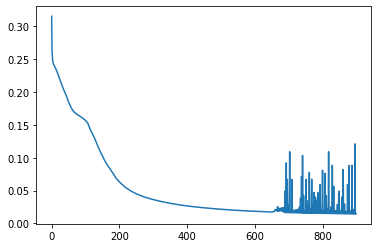

In [52]:
layer_dims = [2, 4, 8, 1]
params = inizialize_parameters_deep(layer_dims)
errors = []

for _ in range(90000):
  output = train(params, lr=0.00005, x_data=X)

  if _ % 100 == 0:
    error = mse(Y, output)
    print(error)
    errors.append(error)

plt.plot(errors)

**Cremos datos random y usamos la red para identificar los valores que estan en el centro** *es decir, lo probamos to*

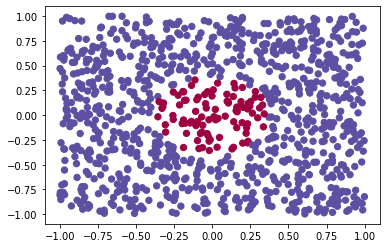

In [53]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y_test = train(params, lr=0.00005, x_data=data_test, training=False)
y_test = np.where(y_test >= 0.5, 1, 0)
plt.scatter(data_test[:, 0], data_test[:, 1], c=y_test[:, 0], s=40, cmap=plt.cm.Spectral)